In [ ]:
"""
To generate these slides, in a command prompt type:

jupyter nbconvert presentation_slides.ipynb --to slides --post serve
"""

# I'm James...
### A Senior Accounting Support Specialist at Xero

# Text Clustering within an Email Support Environment

Knowledge is how we answer cases. Knowledge is created with humans predicting what questions will be asked, and the on an as-needed basis.

With a 'as needed basis' agents become opt for quick over improvement so the hypothesis is that we have large Knowledge articles comprising of multiple topics.

The solution is to use Text Clustering and Topic Identification to extract these topics.

## The Pipeline

* Get Data
* Clean the data - using regex
* Dimension reduction?
* Fit KMeans
* Generate labels
* Happy (hopefully) days

In [3]:
# Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
import nltk
import re

from nltk.collocations import *
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

% matplotlib inline

In [5]:
cleaned = pd.read_csv('./data/final_feature.csv', usecols=[1],
                     header=0)

cleaned = cleaned.fillna('empty')

## Cleaning, there's a Quote...

Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems.

In [ ]:
data['description'] = data['description'].str.replace(r'([a-z0-9_\.-]+)@([\da-z\.-]+)\.([a-z\.]{2,6})', '') # Removes emails
data['description'] = data['description'].str.replace(r'<(.*?)\>', '') # Needs punct to clean
data['description'] = data['description'].str.replace(r'[^\w\s]', '') 
data['description'] = data['description'].str.replace(r'www[a-z]+', '')
data['description'] = data['description'].str.replace(r'http[a-z]+', '')
data['description'] = data['description'].str.replace(r'https[a-z]+', '')
data['description'] = data['description'].str.replace(r'supportxerocom', '')
data['description'] = data['description'].str.replace(r'\d', '') # removes numbers eg phone numbers

In [ ]:
data['description'] = data['description'].str.lower().str.split() # Split data

# Remove stopwords from text using NLTK
stop = stopwords.words('english')
stop.append('hello')
stop.append('hi')
stop.append('dear')
stop.append('sir')
stop.append('sirs')
stop.append('thank')
stop.append('facebook')
stop.append('twitter')
stop.append('linkedin') # Newly added

data['description'] = data['description'].apply(lambda x: [item for item in x if item not in stop])

# Stem words for better model performance
stemmer = SnowballStemmer("english")
data['description'] = data['description'].apply(lambda x: [stemmer.stem(y) for y in x])

# Vectorise
### TF-IDF Vector

In [6]:
# Setup Vector
vectorizer = TfidfVectorizer(max_df=0.9,
                            min_df=0.001)
X = vectorizer.fit_transform(cleaned['description'])

# Clustering
### K-Means Clustering 

In [41]:
true_k = 22 ## Randomly set to 8. Play around with clusters at later stage
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


print("\n")
print("Prediction")

Y = vectorizer.transform(["invoice needs bigger logo"])
prediction = model.predict(Y)
print prediction

Y = vectorizer.transform(["bank transaction doesn't have abiliy to edit"])
prediction = model.predict(Y)
print prediction

Y = vectorizer.transform(["report with custom running balance"])
prediction = model.predict(Y)
print prediction

Top terms per cluster:
Cluster 0:  budget  varianc  report  actual  track  year  manag  show  one  drop
Cluster 1:  employe  payrol  leav  hour  xero  pay  timesheet  staff  client  set
Cluster 2:  email  ani  intend  messag  confidenti  inform  recipi  may  pleas  copi
Cluster 3:  date  month  year  report  invoic  end  due  transact  chang  enter
Cluster 4:  payment  invoic  batch  await  account  show  pay  bank  supplier  credit
Cluster 5:  field  custom  add  possibl  descript  refer  invoic  name  column  would
Cluster 6:  invoic  email  send  custom  xero  address  way  client  like  sent
Cluster 7:  file  xero  export  upload  import  csv  attach  invoic  direct  use
Cluster 8:  xero  client  user  featur  account  access  use  see  pleas  would
Cluster 9:  invoic  would  account  xero  regard  possibl  way  pleas  like  need
Cluster 10:  item  line  invoic  inventori  price  code  sale  cost  way  default
Cluster 11:  bank  transact  account  reconcil  feed  rule  code  xero  

In [42]:
k_means_labels = model.labels_
unique, counts = np.unique(k_means_labels, return_counts=True)
dict(zip(unique, counts))

{0: 25,
 1: 60,
 2: 175,
 3: 90,
 4: 94,
 5: 77,
 6: 172,
 7: 94,
 8: 244,
 9: 439,
 10: 88,
 11: 166,
 12: 82,
 13: 39,
 14: 64,
 15: 63,
 16: 69,
 17: 44,
 18: 35,
 19: 63,
 20: 38,
 21: 159}

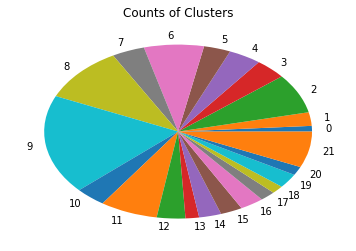

In [43]:
plt.pie(counts, labels=unique)
plt.title('Counts of Clusters')
plt.show()

# K-Means Bigram Clustering

An attempt to capture semantic relationships between words. 

Research from KHL University, Sweden, suggested doing this leads to better model performance.

# The results... Were unexpected.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#999;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#999;color:#444;background-color:#F7FDFA;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#999;color:#fff;background-color:#26ADE4;}
.tg .tg-vn4c{background-color:#D2E4FC}
.tg .tg-e3zv{font-weight:bold}
.tg .tg-9hbo{font-weight:bold;vertical-align:top}
.tg .tg-6k2t{background-color:#D2E4FC;vertical-align:top}
.tg .tg-yw4l{vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-e3zv"># of Clusters</th>
    <th class="tg-9hbo">Single Word</th>
    <th class="tg-9hbo">Bi-gram Model</th>
  </tr>
  <tr>
    <td class="tg-6k2t">8</td>
    <td class="tg-6k2t">0.0135</td>
    <td class="tg-6k2t">0.0112</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-yw4l">0.0145</td>
    <td class="tg-yw4l">0.0118</td>
  </tr>
  <tr>
    <td class="tg-vn4c">15</td>
    <td class="tg-6k2t">0.0174</td>
    <td class="tg-6k2t">0.0127</td>
  </tr>
  <tr>
    <td class="tg-031e">20</td>
    <td class="tg-yw4l">0.0203</td>
    <td class="tg-yw4l">0.0146</td>
  </tr>
  <tr>
    <td class="tg-vn4c">25</td>
    <td class="tg-6k2t">0.0200</td>
    <td class="tg-6k2t">0.1507</td>
  </tr>
  <tr>
    <td class="tg-yw4l">30</td>
    <td class="tg-yw4l">0.0172</td>
    <td class="tg-yw4l">0.0125</td>
  </tr>
  <tr>
    <td class="tg-6k2t">35</td>
    <td class="tg-6k2t">0.0189</td>
    <td class="tg-6k2t">0.0140</td>
  </tr>
  <tr>
    <td class="tg-yw4l">40</td>
    <td class="tg-yw4l">0.0210</td>
    <td class="tg-yw4l">0.0142</td>
  </tr>
  <tr>
    <td class="tg-6k2t">45</td>
    <td class="tg-6k2t">0.0179</td>
    <td class="tg-6k2t">0.0135</td>
  </tr>
</table>

# Going Forward

This is a relatively big break-through increasing our reporting capabilities as well as making it easier for CX agents to work. Either by creating new KAs, or allowing these large, general KAs to continue being used.

Work started using similar process are:
* NPS Comments, classification and prediction of new datasets (Labelled data - yes!!!)

* Clustering on Xero Love comments

* Same algo/process on 'How to add or edit a DOCX theme?' KA to identify main short-comings of Standard branding themes.

# Fork and Pull it

https://github.com/JamesTrick/TextClustering